# Stages of statistical analysis

## Question

What are the stages of statistical investigation?

## Answer

* See "_Problem Solving a Statistician’s Guide - Christopher Chatfield_".

**Formulating the problem.** 

* Make sure you understand the problem and then formulate it In statistical terms. Clarify the objectives of the investigation very carefully.


**Collecting data**

* Plan the investigation and collect the data in an appropriate way. It is important to achieve a fair balance between the effort needed to collect the data and to analyse them. The method of collection is crucial to the ensuing analysis. For example, data from a designed experiment are quite different in kind to those resulting from a  pure observational study.


**Analysis**

* _Exploratory Data Analysis._ Assess the structure and quality of the data. Scrutinize the data for errors, outliers and missing values. Modify the data if necessary, far example by transforming one or more variables. Carry out an initial examination of the data to obtain summary descriptive statistics and perhaps get ideas for a more formal analysis (Chapter 6). In particular guidance on model formulation may be obtained.

* _Formal analysis._ Select and carry out an appropriate formal statistical procedure to analyse the data. Such procedures often assurne a particular model structure, and may involve estimating the model parameters, and testing hypotheses about the model. The fitted model needs to be evaluated by looking at the residuals from the model to see if it needs to be modified or refined.


**Results and interpretation**

* Compare the findings with any previous results and acquire further data if necessary.

* Interpret and communicate the results. The findings may need to be understood by both statisticians and non-statisticians, and extra care is needed in the presentation of graphs, summary tables and computer output.

# Example 0.5

In this notebook we will look at calculating and presenting some descriptive statistics. There are lots of great datasets freely available online. The dataset we will use comes from the 1994 US census and is available as part of the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will start by reading in the data and ensuring that the column names have been specified correctly. In this case the data is in the `adult.data` file, which is a CSV, and the meta-data, the column names, is in `adult.header`. Sometimes these data are combined in a single file, sometimes they are separate.

In [2]:
header_file = "adult.header"
data_file = "adult.data"

with open(header_file) as f:
    header = f.readlines()[0].split(',')

df = pd.read_table(data_file, delimiter = ",", names=header)

Word processor software will typically have functionality for creating tables. Often when working with code it is useful to be able to construct a table in plain text. An excellent tool for creating tables for LaTeX, HTML or Markdown is [Tables Generator](https://www.tablesgenerator.com/).

## Question

Fill in the values in the following table

| Variable                            | Value |
|-------------------------------------|:-----:|
| Number, _N_                         |   ?   |
| Sex, female, _N_ (%)                | ? (?) |
| Age [years], mean (SD)              | ? (?) |
| Hours worked per week, median (IQR) | ? (?) |

If this seems too easy, why not try generate the text for a markdown table too!

- [hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
- [hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html)

## Answer

| Variable                            | Value |
|-------------------------------------|:-----:|
| Number, _N_                         |   32561   |
| Sex, female, _N_ (%)                | 10771 (33.1) |
| Age [years], mean (SD)              | 38.6 (13.6) |
| Hours worked per week, median (IQR) | 40 (5) |

In [3]:
print("The number of records is {num_records}".format(num_records = df.shape[0]))
print("The number of records with sex as female is {num_female} ({percentage})".format(num_female = df.sex.value_counts()[' Female'], percentage = df.sex.value_counts()[' Female'] / df.shape[0]))
print("The mean age is {mean_age} with a standard deviation of {age_std}".format(mean_age = df.age.mean(), age_std = df.age.std()))

hpw_quantiles = dict(df['hours-per-week'].quantile([0.25,0.5,0.75]))
hpw_iqr = hpw_quantiles[0.75] - hpw_quantiles[0.25]
print("The median hours per week worked is {median_hpw} with an IQR of {iqr_hpw}".format(median_hpw = hpw_quantiles[0.5], iqr_hpw = hpw_iqr))

The number of records is 32561
The number of records with sex as female is 10771 (0.33079450876815825)
The mean age is 38.58164675532078 with a standard deviation of 13.640432553581146
The median hours per week worked is 40.0 with an IQR of 5.0


## Question

Create a histogram of the ages with 70 bins. What do you notice?

- [hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

## Answer

Using 70 bins leads to several bins containing two ages while the others contain only one. This obscures the true distribution. Whenever you are using histograms you need to be careful with the number of bins used.

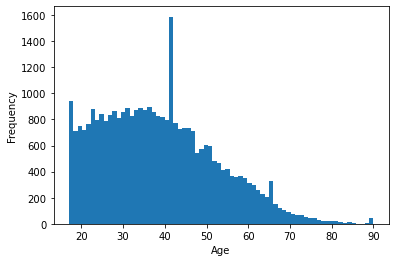

In [4]:
plt.figure()
plt.hist(df.age, bins = 70)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Question

Create another histogram, this time ensure that there is only a single age per column. On top of the histogram draw vertical lines representing the mean and plus/minus two standard deviations. What do you notice?

## Answer

We can provide the bins manually as in the example below. Looking at the mean and two standard emphasises that the data is not normally distributed despite having a vague bell shape.

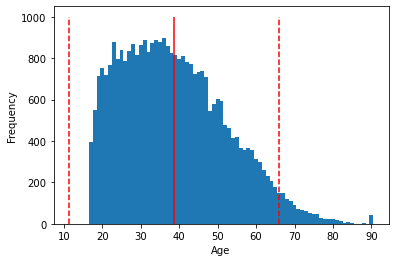

In [5]:
bin_breaks = np.linspace(start = df.age.min() - 0.5,
                         stop = df.age.max() + 0.5,
                         num = df.age.max() - df.age.min() + 2)

plt.figure()
plt.hist(df.age, bins = bin_breaks, density = False)
plt.vlines(df.age.mean(), 0, 1000, color = 'r')
plt.vlines([df.age.mean() - 2 * df.age.std(), df.age.mean() + 2 * df.age.std()], 0, 1000, color = 'r', linestyle='dashed')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Question

Create a boxplot of the ages for females and males. What statistics are used to compute the size of the box, the midline, and the whiskers and points? Given the histogram above, can you predict what it will look like?

## Answer

The midline is the median, the box extends to the first and third quantiles and the whiskers extend to the furthest datapoint within 1.5 IQR of the box. Points beyond the whiskers are represented by points. Given the long tail in the histogram it is not surprising that there are "outliers" at the high age end.

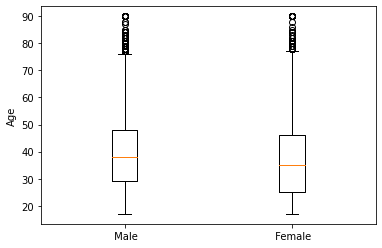

In [6]:
unique_sex = df.sex.unique()
age_grouped = [df[df.sex == sex]['age'] for sex in unique_sex]

plt.figure()
plt.boxplot(x = age_grouped, labels = unique_sex)
plt.ylabel("Age")
plt.show()

## Question

Draw a Tufte style boxplot of the same data. For example, in one variation (of many) the midline is replaced by a point, the box is omitted and the whiskers extend to the most extreme points.

- [hint](https://jrnold.github.io/ggthemes/reference/geom_tufteboxplot.html)

## Answer

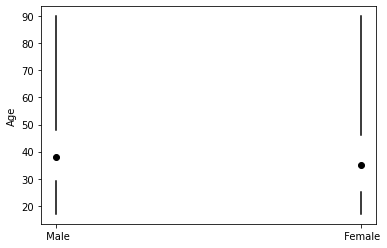

In [7]:
plt.figure()
plt.scatter(x = unique_sex, y = [d.median() for d in age_grouped], color = 'k')
for sex, data in zip(unique_sex, age_grouped):
    plt.plot([sex,sex], [data.min(), data.quantile(0.25)], color = 'k')
    plt.plot([sex,sex], [data.max(), data.quantile(0.75)], color = 'k')
plt.ylabel("Age")
plt.show()